In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv("C:/Users/asd11/OneDrive/桌面/政大數據分析/專案/交通意外縮減.csv")
data.head(4)

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,1810832,A-1810833,2020-09-24 12:22:03,2020-09-24 13:37:04,33.859766,-118.295255,33.859096,-118.289705,0.322,Gardena,...,False,False,False,False,False,Day,Day,Day,Day,2
1,1612482,A-1612483,2021-02-19 09:03:00,2021-02-19 14:45:00,34.619095,-87.008040,34.619097,-87.008166,0.007,Decatur,...,False,False,False,False,False,Day,Day,Day,Day,2
2,2209729,A-2209730,2020-03-20 18:03:03,2020-03-20 18:38:01,35.091940,-80.856370,35.091940,-80.856370,0.000,Charlotte,...,False,False,False,True,False,Day,Day,Day,Day,2
3,2721311,A-2721312,2017-12-20 12:13:48,2017-12-20 18:13:48,34.067360,-117.431140,34.067130,-117.440890,0.558,Bloomington,...,False,False,False,False,False,Day,Day,Day,Day,2


# 資料前處理

In [18]:
def clean(data) :
    
    #嚴重性分級
    severity = []
    for i in data['Severity'] :
        try :
            if i < 3 :
                severity.append('輕度')
            else :
                severity.append('重度')
        except :
            severity.append('無資料')
    data['Severity'] = severity
    return data

In [24]:
#嚴重性二分
severity = []
for i in data['Severity'] :
    try :
        if i < 3 :
            severity.append('輕度')
        else :
            severity.append('重度')
    except :
        severity.append('無資料')
data['Severity'] = severity

In [6]:
#雨量前處理
data['Precipitation(in)'].fillna('nan',inplace=True)
condition = {}
for i in range(len(data)//2) :
    if data.loc[i,'Precipitation(in)'] == 'nan' :
        if data.loc[i,'Weather_Condition'] in condition :
            condition[data.loc[i,'Weather_Condition']] += 1
        else :
            condition[data.loc[i,'Weather_Condition']] = 1

for i in range(len(data)//2,len(data)) :
    if data.loc[i,'Precipitation(in)'] == 'nan' :
        if data.loc[i,'Weather_Condition'] in condition :
            condition[data.loc[i,'Weather_Condition']] += 1
        else :
            condition[data.loc[i,'Weather_Condition']] = 1

print(condition)

{'Clear': 103539, 'Scattered Clouds': 26436, 'Overcast': 43664, 'Partly Cloudy': 30771, 'Mostly Cloudy': 43233, 'Cloudy': 5332, 'Fair': 27094, nan: 34860, 'Light Rain': 2317, 'Smoke': 696, 'Thunderstorm': 429, 'Heavy Rain': 152, 'Haze': 3971, 'Light Snow': 1292, 'Fog': 1934, 'Mist': 259, 'Fair / Windy': 277, 'Rain': 1316, 'Light Rain / Windy': 37, 'Shallow Fog': 84, 'Light Drizzle': 364, 'Thunderstorms and Rain': 56, 'Snow': 215, 'Drizzle': 167, 'Patches of Fog': 165, 'Cloudy / Windy': 106, 'Heavy Drizzle': 10, 'Light Freezing Rain': 41, 'Funnel Cloud': 2, 'Heavy Snow': 56, 'Light Freezing Fog': 211, 'Light Rain Shower': 24, 'Light Thunderstorms and Rain': 90, 'Heavy Thunderstorms and Rain': 26, 'Showers in the Vicinity': 96, 'Mostly Cloudy / Windy': 43, 'Partly Cloudy / Windy': 44, 'Thunder': 12, 'Thunder in the Vicinity': 38, 'Light Freezing Drizzle': 14, 'T-Storm': 42, 'Rain Showers': 19, 'Light Rain with Thunder': 13, 'N/A Precipitation': 13, 'Volcanic Ash': 2, 'Blowing Snow': 33, 

In [ ]:
data['Precipitation(in)'].fillna('nan',inplace=True)

In [7]:
#丟掉
Precipitation_Visibility = Visibility.dropna(subset=['Precipitation(in)'])

In [ ]:
clean(data)

# 先全部刪掉

In [38]:
data.dropna(inplace=True)

# EDA

# 同一場車禍

In [39]:
column_names = ['Start_Time', 'End_Time', 'City', 'County']
df = data[data.duplicated(subset=column_names, keep=False)] 
sort_df = df.sort_values(by='Start_Time')

In [40]:
sort_df.iloc[1,:] == sort_df.iloc[0,:]

Unnamed: 0               False
ID                       False
Start_Time                True
End_Time                  True
Start_Lat                False
Start_Lng                False
End_Lat                  False
End_Lng                  False
Distance(mi)             False
City                      True
County                    True
State                     True
Zipcode                   True
Country                   True
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity                   True
Bump                      True
Crossing                  True
Give_Way                  True
Junction                  True
No_Exit                   True
Railway 

In [41]:
sort_df.iloc[0,:]

Unnamed: 0                             96579
ID                                   A-96580
Start_Time               2016-03-28 07:34:33
End_Time                 2016-03-28 13:34:33
Start_Lat                           40.72705
Start_Lng                          -73.88876
End_Lat                            40.727151
End_Lng                           -73.906532
Distance(mi)                           0.931
City                                 Maspeth
County                                Queens
State                                     NY
Zipcode                                11378
Country                                   US
Timezone                          US/Eastern
Airport_Code                            KLGA
Weather_Timestamp        2016-03-28 07:51:00
Temperature(F)                          44.1
Wind_Chill(F)                           37.4
Humidity(%)                             89.0
Pressure(in)                           29.79
Visibility(mi)                           2.0
Wind_Direc

In [42]:
sort_df.iloc[1,:]

Unnamed: 0                             96580
ID                                   A-96581
Start_Time               2016-03-28 07:34:33
End_Time                 2016-03-28 13:34:33
Start_Lat                           40.72908
Start_Lng                          -73.90967
End_Lat                             40.73215
End_Lng                            -73.91915
Distance(mi)                            0.54
City                                 Maspeth
County                                Queens
State                                     NY
Zipcode                                11378
Country                                   US
Timezone                          US/Eastern
Airport_Code                            KLGA
Weather_Timestamp        2016-03-28 07:51:00
Temperature(F)                          44.1
Wind_Chill(F)                           37.4
Humidity(%)                             89.0
Pressure(in)                           29.79
Visibility(mi)                           2.0
Wind_Direc

In [50]:
times = sort_df.groupby(by=['Start_Time']).size().sort_values(ascending=False)[:10]
times

Start_Time
2021-11-21 18:37:51    47
2021-01-26 16:16:13    37
2019-10-26 08:45:17    24
2021-12-20 08:58:00    21
2020-10-13 19:19:34    18
2021-01-26 16:17:33    17
2021-12-16 14:11:00    16
2021-11-10 15:31:46    14
2021-11-12 14:33:30    13
2020-11-17 13:25:30    12
dtype: int64

In [44]:
data[data['Start_Time']=='2021-11-21 18:37:51']

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
3540,1226055,A-1226056,2021-11-21 18:37:51,2021-11-22 08:00:00,43.010683,-88.225621,43.010998,-88.226601,0.054,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,重度
45867,758548,A-758549,2021-11-21 18:37:51,2021-11-22 08:00:00,43.011461,-88.231971,43.012912,-88.226603,0.289,Waukesha,...,False,True,False,False,False,Night,Night,Night,Night,重度
95216,741721,A-741722,2021-11-21 18:37:51,2021-11-22 08:00:00,43.012967,-88.232010,43.013100,-88.232153,0.012,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,重度
141327,1134043,A-1134044,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013295,-88.228886,43.012306,-88.231983,0.171,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,重度
162975,1038847,A-1038848,2021-11-21 18:37:51,2021-11-22 08:00:00,43.010140,-88.227887,43.010714,-88.229151,0.075,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,重度
174836,755006,A-755007,2021-11-21 18:37:51,2021-11-22 08:00:00,43.011586,-88.231691,43.010223,-88.231571,0.094,Waukesha,...,False,True,False,False,False,Night,Night,Night,Night,重度
221357,1288266,A-1288267,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013824,-88.230074,43.013452,-88.230768,0.043,Waukesha,...,True,False,False,True,False,Night,Night,Night,Night,重度
234261,1149690,A-1149691,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013348,-88.229638,43.013430,-88.230826,0.060,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,重度
305471,763473,A-763474,2021-11-21 18:37:51,2021-11-22 08:00:00,43.010144,-88.226621,43.012912,-88.226603,0.191,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,重度
319004,518857,A-518858,2021-11-21 18:37:51,2021-11-22 08:00:00,43.013176,-88.231477,43.013254,-88.231286,0.011,Waukesha,...,False,False,False,False,False,Night,Night,Night,Night,重度


<BarContainer object of 5 artists>

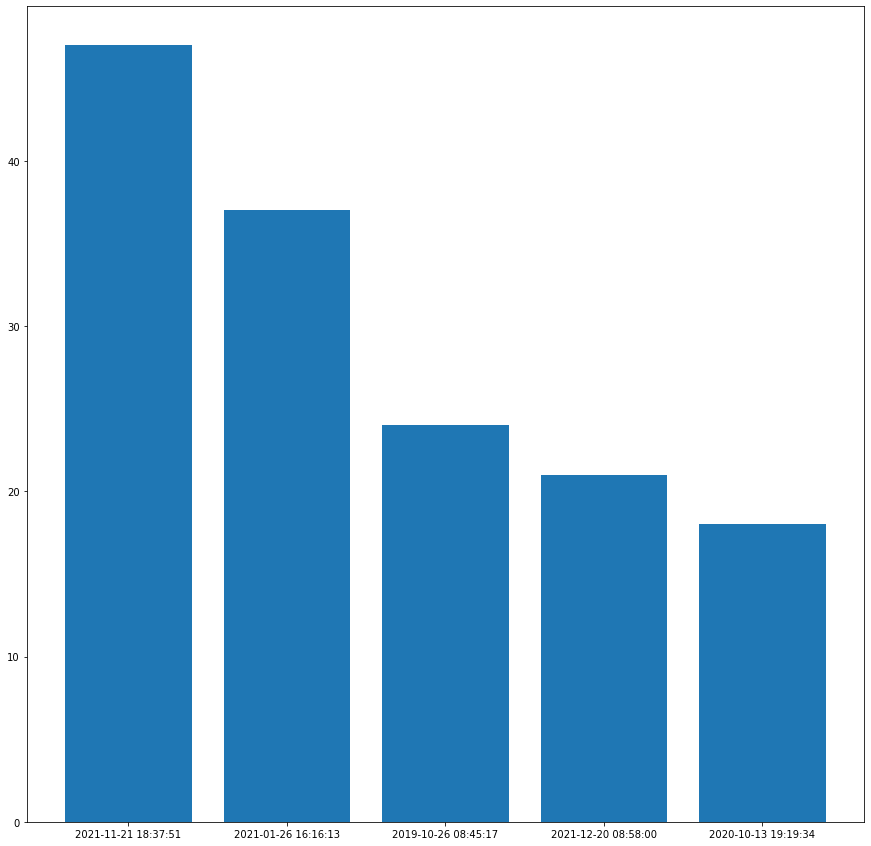

In [58]:
#作圖
plt.figure(figsize=(15,15))
plt.bar(x=times.index[:5],height=times.values[:5])

# 同一個位子

In [59]:
column_names = ['Start_Lat','Start_Lng']
df = data[data.duplicated(subset=column_names,keep=False)]
sort_df = df.sort_values(by='Start_Lat')

In [60]:
table = sort_df.groupby(by=['Start_Lat','Start_Lng']).agg({'Start_Lng':len})
table.columns = ['times']
place = table.sort_values(by='times',ascending=False)[:10]
place

,,times
Start_Lat,Start_Lng,
25.702455,-80.332105,202.0
28.452192,-81.400388,169.0
28.449924,-81.479136,164.0
28.452939,-81.400159,144.0
28.451602,-81.477678,140.0
25.712548,-80.382427,138.0
25.689146,-80.382872,137.0
37.552525,-77.478828,133.0
35.839238,-78.675899,129.0


In [81]:
place.index[:5]

MultiIndex([(25.702455, -80.332105),
            (28.452192, -81.400388),
            (28.449924, -81.479136),
            (28.452939, -81.400159),
            (28.451602, -81.477678)],
           names=['Start_Lat', 'Start_Lng'])

In [83]:
name = []
for i in place.index[:5] :
    name.append(str(i))

['(25.702455, -80.332105)',
 '(28.452192, -81.400388)',
 '(28.449924, -81.479136)',
 '(28.452939, -81.400159)',
 '(28.451602, -81.477678)']

In [90]:
val = [202,169,164,144,140]

In [89]:
name

['(25.702455, -80.332105)',
 '(28.452192, -81.400388)',
 '(28.449924, -81.479136)',
 '(28.452939, -81.400159)',
 '(28.451602, -81.477678)']

<BarContainer object of 5 artists>

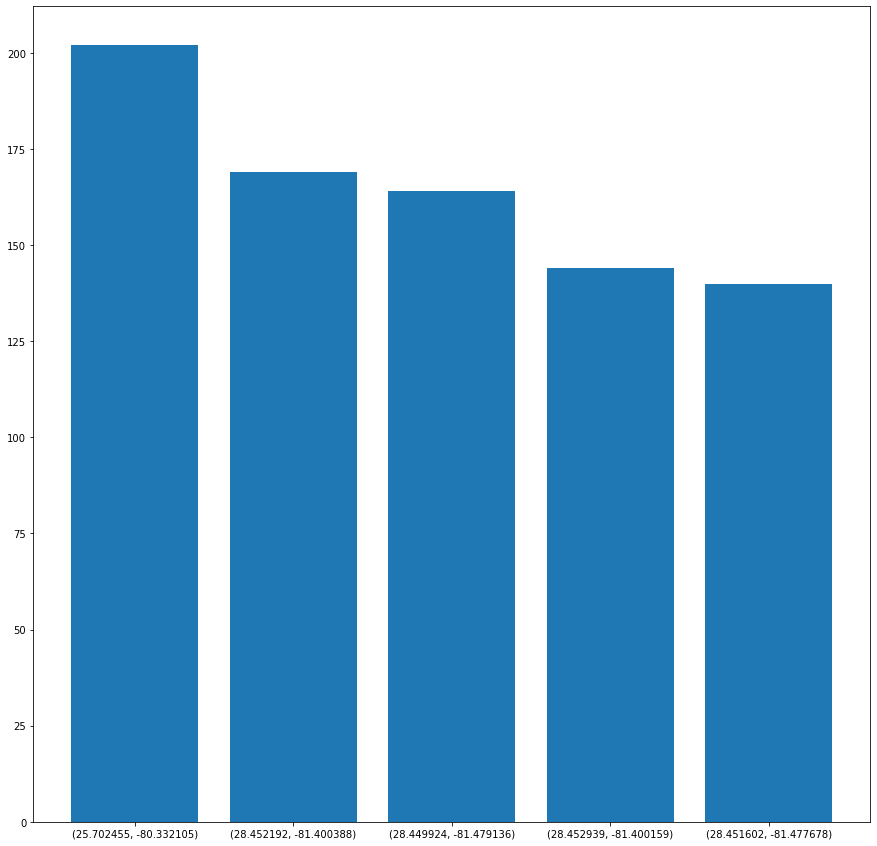

In [91]:
#作圖
plt.figure(figsize=(15,15))
plt.bar(x=name,height=val)

### 各欄位和嚴重程度關係

In [46]:
low = data[data['Severity'] == '輕度'] 
sever = data[data['Severity'] == '嚴重'] 

In [33]:
print(np.mean(low['Pressure(in)']),np.mean(high['Pressure(in)']))

29.459948568092997 29.5893356969469


C:\Users\asd11\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


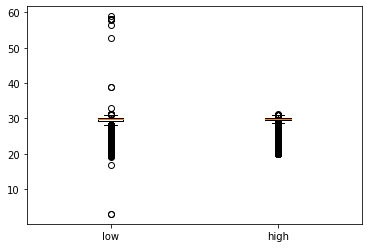

In [31]:
plt.boxplot([low['Pressure(in)'],high['Pressure(in)']],labels=['low','high'])
# plt.ylim(-1,3)
plt.show()

In [34]:
print(np.mean(low['Humidity(%)']),np.mean(high['Humidity(%)']))

64.21217435992834 65.71111097824917


C:\Users\asd11\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


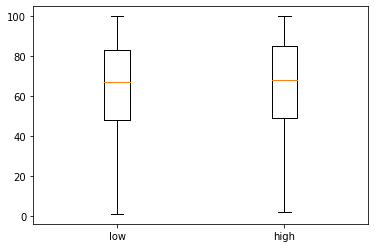

In [32]:
plt.boxplot([low['Humidity(%)'],high['Humidity(%)']],labels=['low','high'])
# plt.ylim(-1,3)
plt.show()

# DecisionTree 可視化(天氣欄位)

In [24]:
data.columns

Index(['Unnamed: 0', 'ID', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Severity'],
      dtype='object')

In [31]:
df = data[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity','Severity']]

In [32]:
df.dropna(inplace=True)

<ipython-input-32-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [11]:
severity = []
for i in df['Severity'] :
    if i < 3 :
        severity.append('輕度')
    else :
        severity.append('重度')
df['Severity'] = severity

<ipython-input-11-8e8d9fcddb6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Severity'] = severity


In [33]:
x = df.drop(['Severity'],axis=1)
y = df['Severity']

In [29]:
x.head()

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1810832,A-1810833,2020-09-24 12:22:03,2020-09-24 13:37:04,33.859766,-118.295255,33.859096,-118.289705,0.322,Gardena,...,False,False,False,False,False,False,Day,Day,Day,Day
1,1612482,A-1612483,2021-02-19 09:03:00,2021-02-19 14:45:00,34.619095,-87.008040,34.619097,-87.008166,0.007,Decatur,...,False,False,False,False,False,False,Day,Day,Day,Day
2,2209729,A-2209730,2020-03-20 18:03:03,2020-03-20 18:38:01,35.091940,-80.856370,35.091940,-80.856370,0.000,Charlotte,...,False,False,False,False,True,False,Day,Day,Day,Day
3,2721311,A-2721312,2017-12-20 12:13:48,2017-12-20 18:13:48,34.067360,-117.431140,34.067130,-117.440890,0.558,Bloomington,...,False,False,False,False,False,False,Day,Day,Day,Day
4,1480039,A-1480040,2021-05-28 17:36:57,2021-05-28 17:47:53,34.314111,-86.902209,34.284021,-86.904779,2.084,Falkville,...,False,False,False,False,False,False,Day,Day,Day,Day


In [34]:
x = pd.get_dummies(x)

In [36]:
y.value_counts()

輕度    1249322
重度      76287
Name: Severity, dtype: int64

In [37]:
Tree = DecisionTreeClassifier(criterion='entropy',max_depth=100,random_state=10)
model = Tree.fit(x,y)
pred = model.predict(x)
print(Tree.feature_importances_)
print(sum(pred==y))
print(model.score(x,y))
print(confusion_matrix(y,pred))

[9.89522500e-02 1.12209842e-01 1.84833687e-01 2.31426351e-01
 3.58224819e-02 9.37861795e-02 1.87556079e-02 3.85682159e-03
 4.79601271e-03 7.78459149e-03 7.69180110e-03 8.64229140e-03
 5.45081375e-04 9.68092751e-03 6.94903037e-03 7.29453638e-03
 8.78496030e-03 9.53050285e-03 8.48229366e-04 1.03342679e-02
 8.96495239e-03 9.83105524e-03 1.01629607e-02 9.75798940e-03
 7.00476851e-04 6.63814743e-03 2.05072626e-04 1.11645069e-02
 8.62699327e-03 8.42038833e-03 6.50953946e-04 9.67966045e-06
 0.00000000e+00 3.06433553e-05 6.79597602e-06 0.00000000e+00
 5.39812391e-05 1.08745255e-02 6.99079741e-04 2.56873451e-04
 0.00000000e+00 5.60487414e-05 7.00389908e-03 6.62939195e-04
 1.06352924e-03 0.00000000e+00 0.00000000e+00 1.44921663e-05
 0.00000000e+00 1.04504179e-03 4.18791367e-05 3.01069200e-05
 7.30563197e-04 4.67687392e-05 0.00000000e+00 0.00000000e+00
 5.62378997e-05 2.69443578e-05 1.13930554e-05 4.00091406e-04
 2.99426731e-05 1.13456797e-05 0.00000000e+00 7.39538647e-06
 1.88196934e-05 0.000000

In [49]:
sorted(Tree.feature_importances_,reverse=True)





























[0.23142635112790508,
 0.18483368684712034,
 0.11220984222314431,
 0.0989522499565329,
 0.09378617949652393,
 0.03582248193192943,
 0.01875560793182254,
 0.011164506901766581,
 0.010952280007539313,
 0.010874525506042475,
 0.010334267862609277,
 0.01016296069810612,
 0.00983105524013007,
 0.009757989402418213,
 0.009680927513480653,
 0.009530502848469711,
 0.009230549475694653,
 0.008964952390891841,
 0.008784960301939794,
 0.00864229139937111,
 0.008626993274681364,
 0.008420388327528016,
 0.007784591488377194,
 0.007691801102727339,
 0.00729453638301211,
 0.007003899083472391,
 0.0069490303660025374,
 0.006638147431004451,
 0.0053163303376424,
 0.004796012709469398,
 0.0038568215948020282,
 0.0019301215251420081,
 0.0015354471388782163,
 0.0013016701828533145,
 0.001186153821675186,
 0.0010635292376568002,
 0.001045041785068153,
 0.0009139544125668159,
 0.0008992337640341465,
 0.0008482293663936812,
 0.0008332070751804405,
 0.0007484591718484102,
 0.000730563196576692,
 0.00070047685

In [ ]:
model_precision = round( precision_score(y, pred, average="macro") * 100, 2)
model_recall = round( recall_score(y, pred, average="macro") * 100, 2)
model_fscore = round( f1_score(y, pred, average="macro") * 100, 2)
models = pd.DataFrame({
        'precision': [model_precision],
        'recall': [model_recall],
        'fscore': [model_fscore],
})
print(models)

In [ ]:
low = data[data['Severity'] == '輕度'] 
sever = data[data['Severity'] == '嚴重'] 

In [40]:
low['new_columns'] = (0.3540787 * low['Humidity(%)']) + (0.62101417 * low['Pressure(in)'])

<ipython-input-40-4b490e7e1e61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['new_columns'] = (0.3540787 * low['Humidity(%)']) + (0.62101417 * low['Pressure(in)'])


In [41]:
high['new_columns'] = (0.3540787 * high['Humidity(%)']) + (0.62101417 * high['Pressure(in)'])

<ipython-input-41-29a86cee18c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high['new_columns'] = (0.3540787 * high['Humidity(%)']) + (0.62101417 * high['Pressure(in)'])


C:\Users\asd11\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


{'whiskers': [<matplotlib.lines.Line2D at 0x1de92387c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1de923966a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de92387910>,
 'medians': [<matplotlib.lines.Line2D at 0x1de92396d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1de92387970>,
 'means': []}

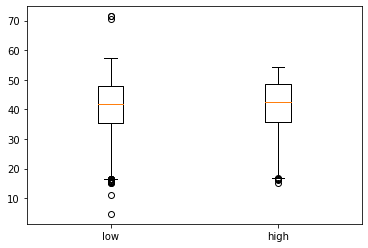

In [43]:
plt.boxplot([low['new_columns'],high['new_columns']],labels=['low','high'])

# 特徵工程
Temperature(F)           
Wind_Chill(F)            
Humidity(%)             
Pressure(in)             
Visibility(mi)           
Wind_Direction           
Wind_Speed(mph)          
Precipitation(in)        

In [10]:
data = pd.read_csv("C:/Users/asd11/OneDrive/桌面/政大數據分析/專案/交通意外縮減.csv")
data.head(4)

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,1810832,A-1810833,2020-09-24 12:22:03,2020-09-24 13:37:04,33.859766,-118.295255,33.859096,-118.289705,0.322,Gardena,...,False,False,False,False,False,Day,Day,Day,Day,2
1,1612482,A-1612483,2021-02-19 09:03:00,2021-02-19 14:45:00,34.619095,-87.008040,34.619097,-87.008166,0.007,Decatur,...,False,False,False,False,False,Day,Day,Day,Day,2
2,2209729,A-2209730,2020-03-20 18:03:03,2020-03-20 18:38:01,35.091940,-80.856370,35.091940,-80.856370,0.000,Charlotte,...,False,False,False,True,False,Day,Day,Day,Day,2
3,2721311,A-2721312,2017-12-20 12:13:48,2017-12-20 18:13:48,34.067360,-117.431140,34.067130,-117.440890,0.558,Bloomington,...,False,False,False,False,False,Day,Day,Day,Day,2


In [4]:
def clean(data) :
    data.dropna(inplace=True)
    
    #嚴重性分級
    severity = []
    for i in data['Severity'] :
        try :
            if i < 3 :
                severity.append('輕度')
            else :
                severity.append('重度')
        except :
            severity.append('無資料')
    data['Severity'] = severity
    
    return data

In [22]:
data = data[['Temperature(F)',
'Wind_Chill(F)',
'Humidity(%)',
'Pressure(in)',
'Visibility(mi)',
'Wind_Speed(mph)',
'Precipitation(in)',
    'Severity']]

In [11]:
clean(data)

,Unnamed: 0,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,1810832,A-1810833,2020-09-24 12:22:03,2020-09-24 13:37:04,33.859766,-118.295255,33.859096,-118.289705,0.322,Gardena,...,False,False,False,False,False,Day,Day,Day,Day,輕度
1,1612482,A-1612483,2021-02-19 09:03:00,2021-02-19 14:45:00,34.619095,-87.008040,34.619097,-87.008166,0.007,Decatur,...,False,False,False,False,False,Day,Day,Day,Day,輕度
2,2209729,A-2209730,2020-03-20 18:03:03,2020-03-20 18:38:01,35.091940,-80.856370,35.091940,-80.856370,0.000,Charlotte,...,False,False,False,True,False,Day,Day,Day,Day,輕度
4,1480039,A-1480040,2021-05-28 17:36:57,2021-05-28 17:47:53,34.314111,-86.902209,34.284021,-86.904779,2.084,Falkville,...,False,False,False,False,False,Day,Day,Day,Day,輕度
5,2121819,A-2121820,2020-05-17 15:06:42,2020-05-17 15:21:42,42.394190,-71.262480,42.394190,-71.262480,0.000,Waltham,...,False,False,False,False,False,Day,Day,Day,Day,重度
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707198,732180,A-732181,2021-12-11 15:48:58.000000000,2021-12-11 17:21:00.000000000,35.986062,-83.948998,35.981804,-83.938326,0.665,Knoxville,...,False,False,False,False,False,Day,Day,Day,Day,輕度
1707200,1692743,A-1692744,2021-01-05 15:37:30,2021-01-05 20:50:12,25.823138,-80.321467,25.858547,-80.322462,2.447,Miami,...,False,False,False,False,False,Day,Day,Day,Day,輕度
1707201,2356330,A-2356331,2020-02-28 05:47:30,2020-02-28 06:38:32,34.249720,-117.442180,34.249770,-117.442280,0.007,San Bernardino,...,False,False,False,False,False,Night,Night,Day,Day,輕度
1707202,2229084,A-2229085,2020-03-31 08:09:57,2020-03-31 08:24:57,40.625560,-75.486310,40.619250,-75.499970,0.839,Whitehall,...,False,False,False,False,False,Day,Day,Day,Day,重度


In [12]:
cols = ['Temperature(F)',
'Wind_Chill(F)',
'Humidity(%)',
'Pressure(in)',
'Visibility(mi)',
'Wind_Speed(mph)',
'Precipitation(in)']

for col in cols :
    print(col)
    classify = []
    aver = np.mean(data[col])
    for i in data[col] :
        if i < aver :
            classify.append('低')
        elif i >= aver :
            classify.append('高')
    data[col] = classify

Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Speed(mph)
Precipitation(in)


In [15]:
for col in cols :
    print(data[col].value_counts())

高    715674
低    608637
Name: Temperature(F), dtype: int64
高    742278
低    582033
Name: Wind_Chill(F), dtype: int64
高    714326
低    609985
Name: Humidity(%), dtype: int64
高    901372
低    422939
Name: Pressure(in), dtype: int64
高    1063853
低     260458
Name: Visibility(mi), dtype: int64
低    757907
高    566404
Name: Wind_Speed(mph), dtype: int64
低    1226255
高      98056
Name: Precipitation(in), dtype: int64


In [30]:
low = data[data['Severity'] == '輕度'] 
high = data[data['Severity'] == '重度'] 

In [31]:
low.columns

Index(['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Severity'],
      dtype='object')

In [35]:
for i in range(len(low.columns)-1) :
    for j in range(i+1,len(low.columns)-1) :
        print(low.columns[i],low.columns[j])

Temperature(F) Wind_Chill(F)
Temperature(F) Humidity(%)
Temperature(F) Pressure(in)
Temperature(F) Visibility(mi)
Temperature(F) Wind_Speed(mph)
Temperature(F) Precipitation(in)
Wind_Chill(F) Humidity(%)
Wind_Chill(F) Pressure(in)
Wind_Chill(F) Visibility(mi)
Wind_Chill(F) Wind_Speed(mph)
Wind_Chill(F) Precipitation(in)
Humidity(%) Pressure(in)
Humidity(%) Visibility(mi)
Humidity(%) Wind_Speed(mph)
Humidity(%) Precipitation(in)
Pressure(in) Visibility(mi)
Pressure(in) Wind_Speed(mph)
Pressure(in) Precipitation(in)
Visibility(mi) Wind_Speed(mph)
Visibility(mi) Precipitation(in)
Wind_Speed(mph) Precipitation(in)


Temperature(F) Wind_Chill(F)
0.43859696908278584
0.4543015701848978
0.01570460110211197


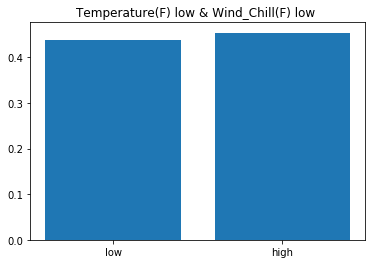

Temperature(F) Humidity(%)
0.14940689867328277
0.15486178690723548
0.005454888233952709


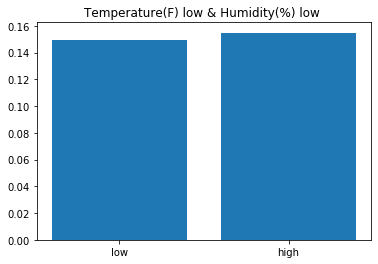

Temperature(F) Pressure(in)
0.16833791434378328
0.19748296993766604
0.02914505559388275


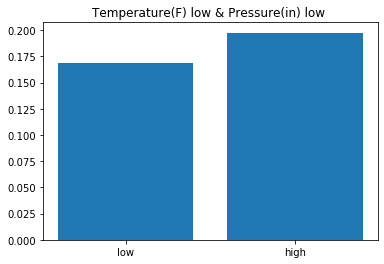

Temperature(F) Visibility(mi)
0.12601210155823786
0.14779990005523264
0.021787798496994776


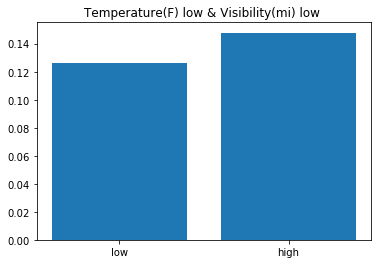

Temperature(F) Wind_Speed(mph)
0.294034378807773
0.24340496041661186
0.05062941839116114


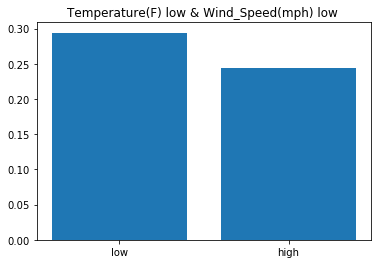

Temperature(F) Precipitation(in)
0.4126914951825288
0.3995160569159149
0.013175438266613881


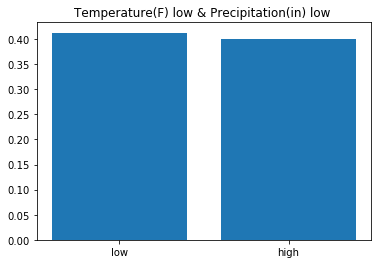

Wind_Chill(F) Humidity(%)
0.14025582626821623
0.14660319297230479
0.006347366704088558


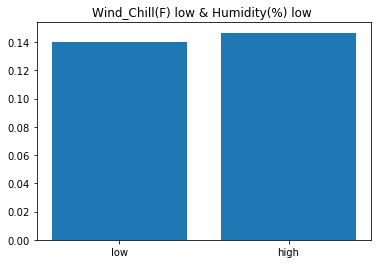

Wind_Chill(F) Pressure(in)
0.16249302033455928
0.18838273585650037
0.02588971552194108


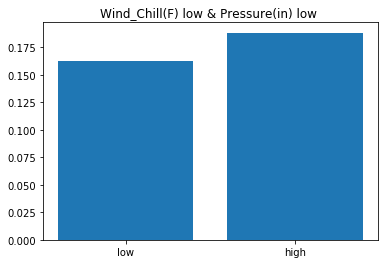

Wind_Chill(F) Visibility(mi)
0.12173417748898675
0.14463059887956656
0.022896421390579805


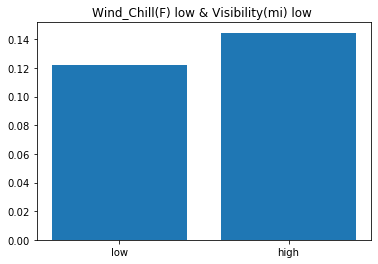

Wind_Chill(F) Wind_Speed(mph)
0.28092422386520854
0.23310801925251834
0.047816204612690205


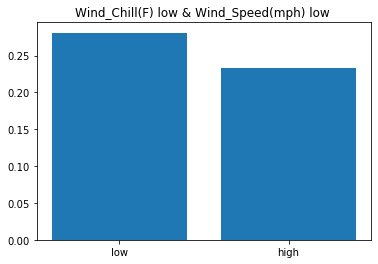

Wind_Chill(F) Precipitation(in)
0.39374926398076054
0.38291996528234395
0.01082929869841659


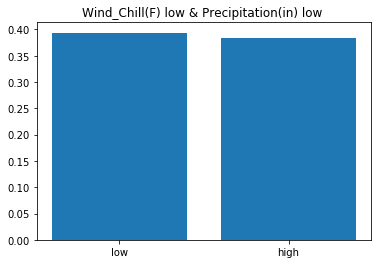

Humidity(%) Pressure(in)
0.1619955314118992
0.21886588990294836
0.056870358491049156


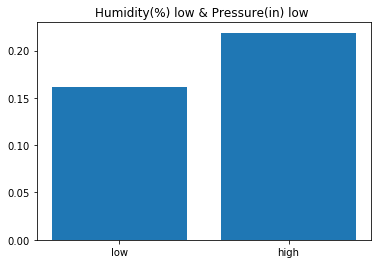

Humidity(%) Visibility(mi)
0.02604566804110332
0.013887062412877094
0.012158605628226226


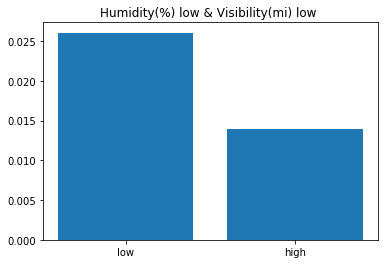

Humidity(%) Wind_Speed(mph)
0.22914532043974495
0.18485836774414138
0.044286952695603565


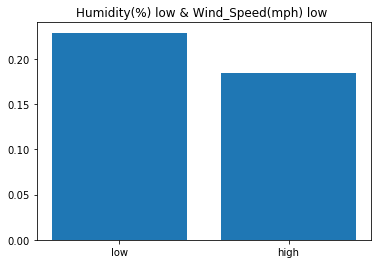

Humidity(%) Precipitation(in)
0.46011476692924363
0.45263144051971277
0.007483326409530866


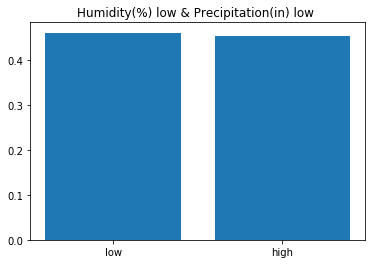

Pressure(in) Visibility(mi)
0.06883932870238707
0.07986375950132821
0.011024430798941137


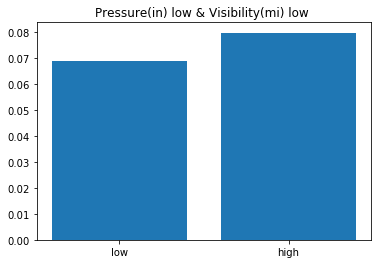

Pressure(in) Wind_Speed(mph)
0.1722945935531524
0.204518555535099
0.0322239619819466


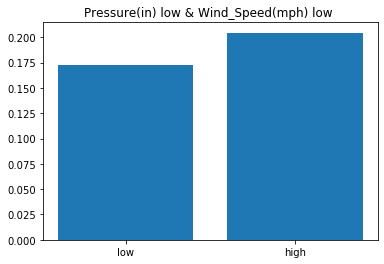

Pressure(in) Precipitation(in)
0.2877488746416037
0.3887193919149943
0.10097051727339063


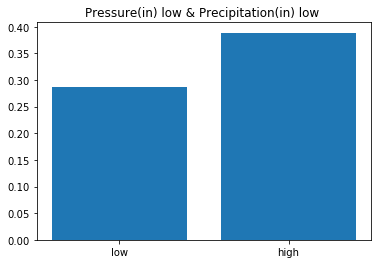

Visibility(mi) Wind_Speed(mph)
0.1273667775135007
0.10591515215275768
0.02145162536074302


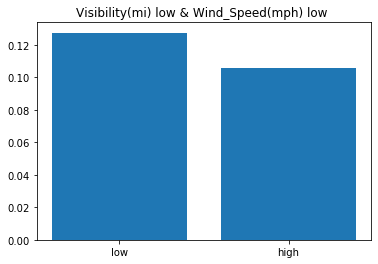

Visibility(mi) Precipitation(in)
0.14382076299259214
0.1319796954314721
0.01184106756112005


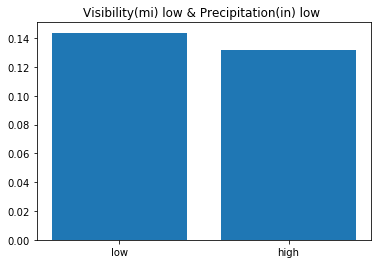

Wind_Speed(mph) Precipitation(in)
0.5418239177613159
0.45263144051971277
0.08919247724160312


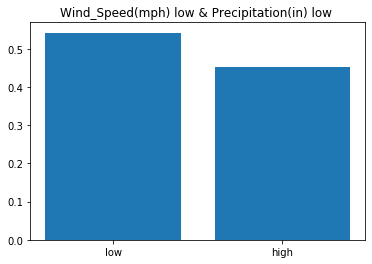

In [42]:
for i in range(len(low.columns)-1) :
    for j in range(i+1,len(low.columns)-1) :
        low_fliter_one = low[low.columns[i]] == '低'
        high_fliter_one = high[low.columns[i]] == '低'

        low_fliter_two = low[low.columns[j]] == '低'
        high_fliter_two = high[low.columns[j]] == '低'

        low_fliter = low[(low_fliter_one) & (low_fliter_two)]
        high_fliter = high[(high_fliter_one) & (high_fliter_two)]
        print(low.columns[i],low.columns[j])
        print(len(low_fliter)/len(low))
        print(len(high_fliter)/len(high))
        print(abs(len(low_fliter)/len(low)-len(high_fliter)/len(high)))
        plt.title(f"{low.columns[i]} low & {low.columns[j]} low ")
        plt.bar(x=['low','high'],height=[len(low_fliter)/len(low),len(high_fliter)/len(high)])
        plt.savefig(f"{low.columns[i]} low & {low.columns[j]} low.png")
        plt.show()

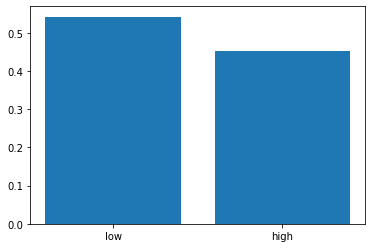

In [37]:
plt.bar(x=['low','high'],height=[len(low_fliter)/len(low),len(high_fliter)/len(high)])
plt.show()